In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [130]:
os.getcwd()

'C:\\Users\\npana\\Desktop\\Data'

In [131]:
os.chdir('C:\\Users\\npana\\Desktop\\Data')

In [132]:
df=pd.read_csv('sales.csv',parse_dates=['date'])
df.tail()

,account number,name,sku,category,quantity,unit price,ext price,date
995,758133,"Kihn, McClure and Denesik",WJ-02096,Belt,11,60.50,665.50,2014-08-03 10:39:00
996,850140,Kunze Inc,GS-86623,Shoes,16,19.66,314.56,2014-05-03 21:18:00
997,93356,Waters-Walker,GS-86623,Shoes,13,90.95,1182.35,2014-06-14 12:43:00
998,304860,Huel-Haag,LL-46261,Shoes,9,98.22,883.98,2014-07-26 01:10:00
999,98022,Heidenreich-Bosco,LW-86841,Shoes,14,74.83,1047.62,2014-06-27 05:58:00


In [133]:
df.dtypes

account number             int64
name                      object
sku                       object
category                  object
quantity                   int64
unit price               float64
ext price                float64
date              datetime64[ns]
dtype: object

In [134]:
df.describe()

,account number,quantity,unit price,ext price
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,535208.897000,10.328000,56.179630,579.84390
std,277589.746014,5.687597,25.331939,435.30381
min,93356.000000,1.000000,10.060000,10.38000
25%,299771.000000,5.750000,35.995000,232.60500
50%,563905.000000,10.000000,56.765000,471.72000
75%,750461.000000,15.000000,76.802500,878.13750
max,995267.000000,20.000000,99.970000,1994.80000


In [135]:
df.shape

(1000, 8)

In [136]:
df.rename({'ext price':'total price','sku':'transaction code' },axis=1,inplace=True)
df.head()

,account number,name,transaction code,category,quantity,unit price,total price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:00
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:00
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:00
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:00
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:00


In [137]:
df.rename({'tarnsaction code':'transaction code'}, axis=1, inplace=True)
df.tail()

,account number,name,transaction code,category,quantity,unit price,total price,date
995,758133,"Kihn, McClure and Denesik",WJ-02096,Belt,11,60.50,665.50,2014-08-03 10:39:00
996,850140,Kunze Inc,GS-86623,Shoes,16,19.66,314.56,2014-05-03 21:18:00
997,93356,Waters-Walker,GS-86623,Shoes,13,90.95,1182.35,2014-06-14 12:43:00
998,304860,Huel-Haag,LL-46261,Shoes,9,98.22,883.98,2014-07-26 01:10:00
999,98022,Heidenreich-Bosco,LW-86841,Shoes,14,74.83,1047.62,2014-06-27 05:58:00


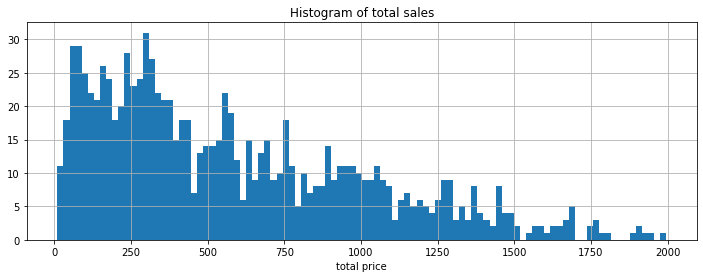

In [138]:
df_plot=df['total price'].hist(bins=100, figsize=(12,4))
df_plot.set_title("Histogram of total sales")
df_plot.set_xlabel("total price")
plt.show()

In [139]:
purchage_pattern=df[['total price', 'category', 'date']]
purchage_pattern=purchage_pattern.set_index('date')
purchage_pattern.head()

,total price,category
date,,
2014-09-27 07:13:00,578.24,Belt
2014-07-29 02:10:00,1018.78,Shoes
2014-03-01 10:51:00,289.92,Shirt
2013-11-17 20:41:00,413.40,Shirt
2014-01-03 08:14:00,1793.52,Shirt


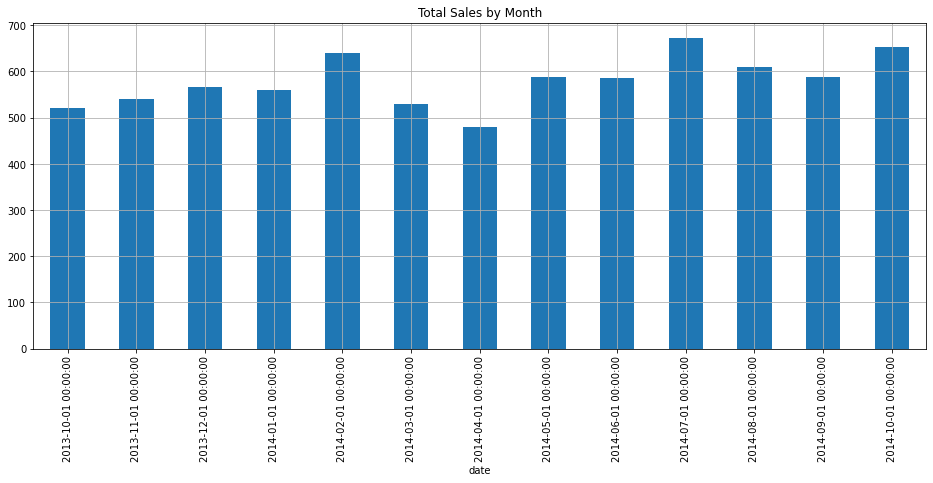

In [140]:
month_plot=purchage_pattern.resample('MS').mean().plot(title='Total Sales by Month', kind='bar', figsize=(16,6), grid=True, legend=None)


In [141]:
df.category.value_counts()

Shirt    404
Shoes    400
Belt     196
Name: category, dtype: int64

<AxesSubplot:>

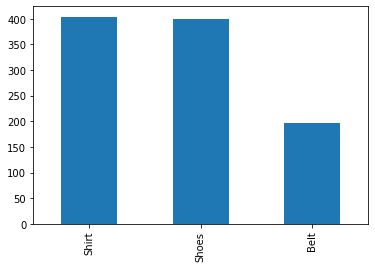

In [142]:
df.category.value_counts().plot(kind='bar')

In [143]:
df.name.value_counts()

Senger, Upton and Breitenberg    59
Kihn, McClure and Denesik        58
Hegmann and Sons                 58
Carroll PLC                      57
Waelchi-Fahey                    54
Kunze Inc                        54
Koelpin PLC                      53
Kerluke, Reilly and Bechtelar    52
Berge LLC                        52
Kuphal, Zieme and Kub            52
Cole-Eichmann                    51
Waters-Walker                    50
Volkman, Goyette and Lemke       48
Ernser, Cruickshank and Lind     47
Kilback-Gerlach                  45
Hamill-Hackett                   44
Huel-Haag                        43
Gorczany-Hahn                    42
Davis, Kshlerin and Reilly       41
Heidenreich-Bosco                40
Name: name, dtype: int64

<AxesSubplot:>

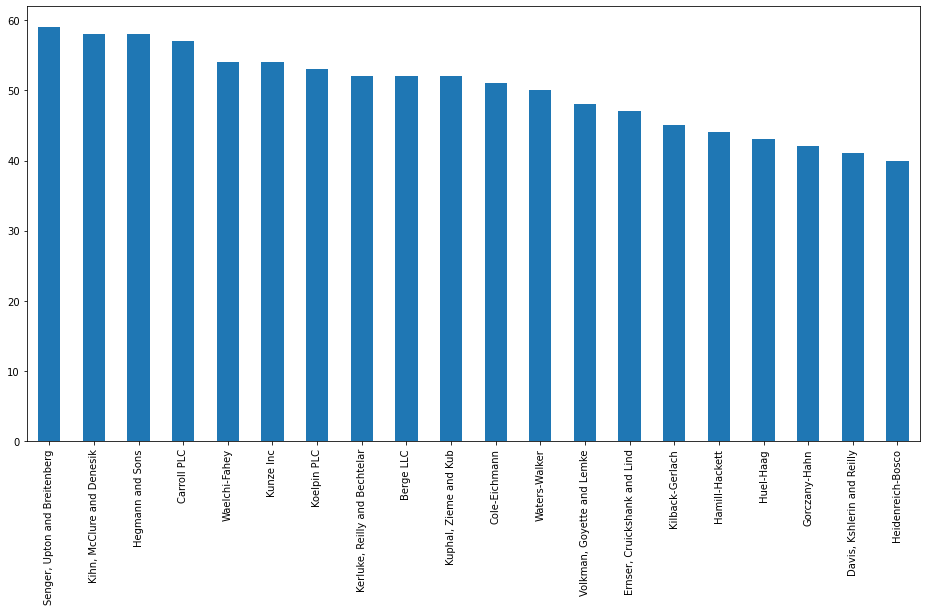

In [144]:
df.name.value_counts().plot(kind='bar', figsize=(16,8))

In [145]:
df[df['category'].str.startswith('S')][::50].style.bar(subset=['quantity', 'unit price', 'total price'],color='#ff00ff',align='left')

,account number,name,transaction code,category,quantity,unit price,total price,date
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.620000,1018.780000,2014-07-29 02:10:00
59,850140,Kunze Inc,LW-86841,Shoes,16,66.610000,1065.760000,2014-07-25 22:56:00
120,201259,Koelpin PLC,LL-46261,Shoes,16,80.820000,1293.120000,2014-08-19 00:53:00
174,201259,Koelpin PLC,MJ-21460,Shoes,20,45.320000,906.400000,2014-07-06 22:06:00
234,524021,Hegmann and Sons,GS-86623,Shoes,10,31.810000,318.100000,2013-11-18 23:11:00
298,563905,"Kerluke, Reilly and Bechtelar",FK-71853,Shirt,17,75.690000,1286.730000,2013-11-25 02:35:00
361,305803,"Davis, Kshlerin and Reilly",LL-46261,Shoes,13,77.780000,1011.140000,2013-11-30 17:23:00
432,93356,Waters-Walker,VG-32047,Shirt,13,45.970000,597.610000,2014-07-05 08:56:00
493,758133,"Kihn, McClure and Denesik",VG-32047,Shirt,15,80.590000,1208.850000,2014-10-05 18:13:00
561,758133,"Kihn, McClure and Denesik",GS-86623,Shoes,12,19.810000,237.720000,2014-10-12 12:33:00


In [146]:
df[df.category.isin(['Shirt'])]

,account number,name,transaction code,category,quantity,unit price,total price,date
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:00
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:00
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:00
5,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,17,52.82,897.94,2013-12-04 02:07:00
9,563905,"Kerluke, Reilly and Bechtelar",KV-99194,Shirt,12,26.98,323.76,2014-05-20 00:21:00
...,...,...,...,...,...,...,...,...
982,115138,Gorczany-Hahn,VG-32047,Shirt,20,72.35,1447.00,2014-08-11 19:02:00
984,711951,Kilback-Gerlach,VG-32047,Shirt,1,91.96,91.96,2013-10-23 15:08:00
986,93356,Waters-Walker,KV-99194,Shirt,20,99.74,1994.80,2014-04-18 15:39:00
990,93356,Waters-Walker,AS-93055,Shirt,9,68.62,617.58,2014-08-12 08:06:00


In [147]:
sales=df[['name', 'quantity', 'total price', 'date']]
sales.tail()

,name,quantity,total price,date
995,"Kihn, McClure and Denesik",11,665.50,2014-08-03 10:39:00
996,Kunze Inc,16,314.56,2014-05-03 21:18:00
997,Waters-Walker,13,1182.35,2014-06-14 12:43:00
998,Huel-Haag,9,883.98,2014-07-26 01:10:00
999,Heidenreich-Bosco,14,1047.62,2014-06-27 05:58:00


In [148]:
sales_group=sales.groupby('name',sort=False).sum()
sales_group.tail()

,quantity,total price
name,,
Gorczany-Hahn,440,22207.90
Kilback-Gerlach,472,26987.20
Hamill-Hackett,419,23433.78
"Davis, Kshlerin and Reilly",379,19054.76
"Kuphal, Zieme and Kub",552,27031.86


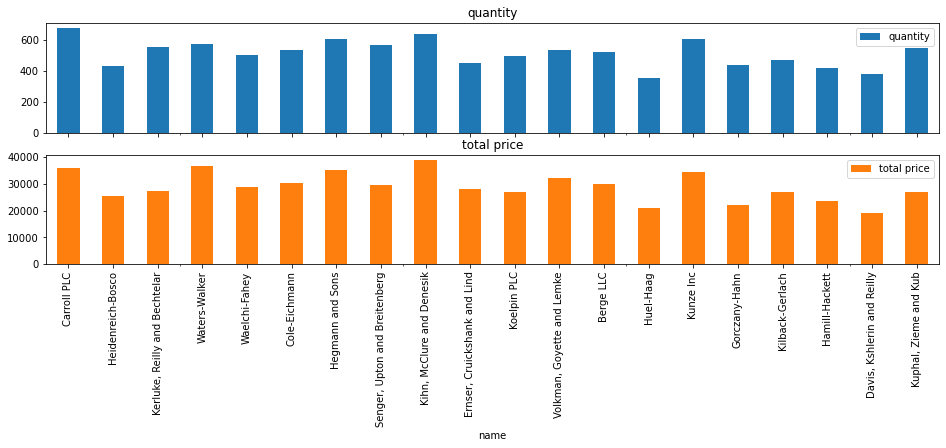

In [149]:
sales_group.plot(kind='bar',subplots=True, layout=(20,1),figsize=(16,48))
plt.show()

In [150]:
sales_date=sales.groupby('date').sum()
sales_date.tail()

,quantity,total price
date,,
2014-10-21 15:55:00,14,568.96
2014-10-22 04:43:00,10,738.20
2014-10-22 07:16:00,5,302.55
2014-10-22 10:04:00,20,650.60
2014-10-22 11:43:00,5,253.15


In [151]:
sales_quantity=sales.groupby('quantity').sum()
sales_quantity.head()

,total price
quantity,
1,2763.45
2,5105.96
3,9422.07
4,11132.88
5,11489.95


<AxesSubplot:ylabel='quantity'>

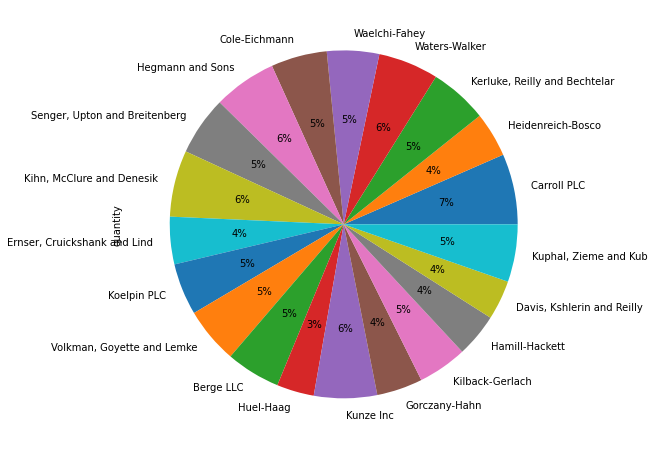

In [152]:
sales_group.quantity.plot(kind='pie', figsize=(16,8),autopct='%.0f%%')

In [153]:
sales_group[sales_group.quantity>650]

,quantity,total price
name,,
Carroll PLC,677,35934.31


In [154]:
sales_group[sales_group.quantity<500]

,quantity,total price
name,,
Heidenreich-Bosco,431,25428.29
"Ernser, Cruickshank and Lind",455,28089.02
Koelpin PLC,497,26811.66
Huel-Haag,358,21087.88
Gorczany-Hahn,440,22207.90
Kilback-Gerlach,472,26987.20
Hamill-Hackett,419,23433.78
"Davis, Kshlerin and Reilly",379,19054.76


In [155]:
sales_group.loc['Koelpin PLC']['quantity']

497.0

In [156]:
customer=df[['name', 'category', 'total price', 'date']]
customer.head()

,name,category,total price,date
0,Carroll PLC,Belt,578.24,2014-09-27 07:13:00
1,Heidenreich-Bosco,Shoes,1018.78,2014-07-29 02:10:00
2,"Kerluke, Reilly and Bechtelar",Shirt,289.92,2014-03-01 10:51:00
3,Waters-Walker,Shirt,413.40,2013-11-17 20:41:00
4,Waelchi-Fahey,Shirt,1793.52,2014-01-03 08:14:00


In [157]:
customer_group=customer.groupby(['name', 'category']).sum()
customer_group.head()

total price
name        category             
Berge LLC   Belt          6033.53
            Shirt         9670.24
            Shoes        14361.10
Carroll PLC Belt          9359.26
            Shirt        13717.61

In [158]:
customer_group.loc['Berge LLC'].loc['Belt']

total price    6033.53
Name: Belt, dtype: float64

In [159]:
unstack=customer_group.unstack()
unstack.head()

total price                    
category                            Belt     Shirt     Shoes
name                                                        
Berge LLC                        6033.53   9670.24  14361.10
Carroll PLC                      9359.26  13717.61  12857.44
Cole-Eichmann                    8112.70  14528.01   7794.71
Davis, Kshlerin and Reilly       1604.13   7533.03   9917.60
Ernser, Cruickshank and Lind     5894.38  16944.19   5250.45

In [160]:
unstack.columns

MultiIndex([('total price',  'Belt'),
            ('total price', 'Shirt'),
            ('total price', 'Shoes')],
           names=[None, 'category'])

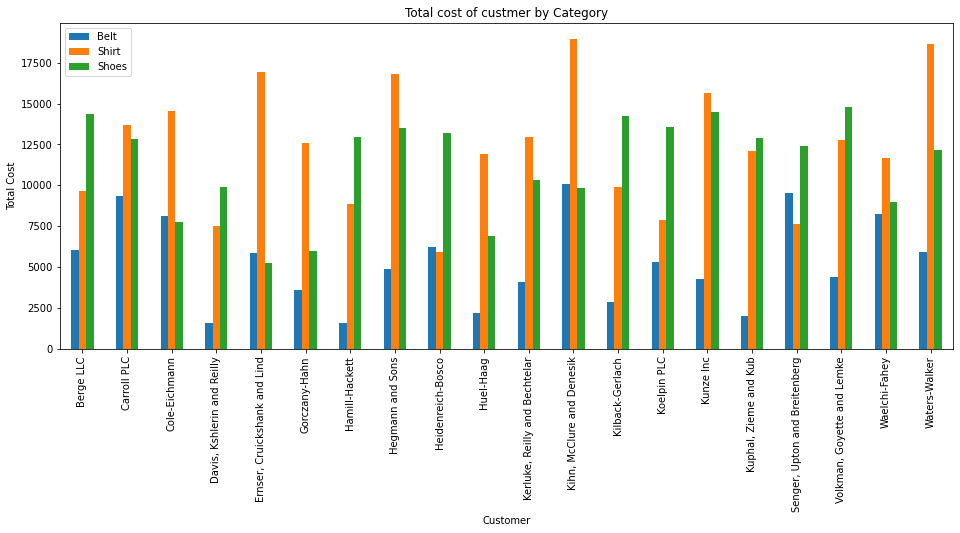

In [161]:
unstack_bar_plot=unstack.plot(kind='bar',title="Total cost of custmer by Category",figsize=(16,6))
unstack_bar_plot.set_xlabel("Customer")
unstack_bar_plot.set_ylabel("Total Cost")
unstack_bar_plot.legend(["Belt", "Shirt", "Shoes"])
plt.show()

In [162]:
quantity=df[["name", "category", "quantity", "date"]]
quantity.head()

,name,category,quantity,date
0,Carroll PLC,Belt,13,2014-09-27 07:13:00
1,Heidenreich-Bosco,Shoes,19,2014-07-29 02:10:00
2,"Kerluke, Reilly and Bechtelar",Shirt,12,2014-03-01 10:51:00
3,Waters-Walker,Shirt,5,2013-11-17 20:41:00
4,Waelchi-Fahey,Shirt,18,2014-01-03 08:14:00


In [163]:
quantity_group=quantity.groupby(["name", "category"]).sum()
quantity_group.head()

quantity
name        category          
Berge LLC   Belt           120
            Shirt          166
            Shoes          236
Carroll PLC Belt           184
            Shirt          257

In [164]:
quantity_unstack=quantity_group.unstack()
quantity_unstack.tail()

quantity            
category                          Belt Shirt Shoes
name                                              
Kuphal, Zieme and Kub               47   252   253
Senger, Upton and Breitenberg      171   144   251
Volkman, Goyette and Lemke          96   220   222
Waelchi-Fahey                      149   201   151
Waters-Walker                       83   288   207

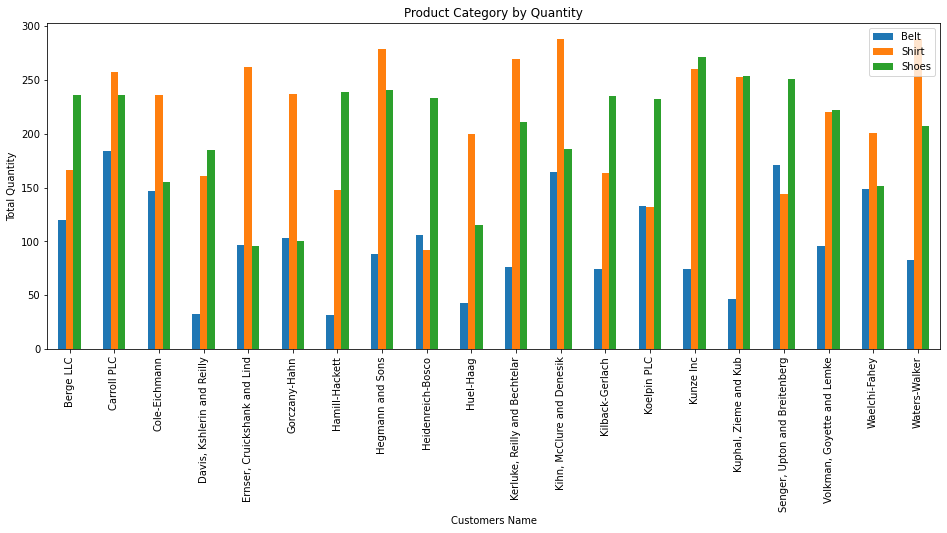

In [165]:
quantity_bar_plot=quantity_unstack.plot(kind='bar', title="Product Category by Quantity", figsize=(16,6))
quantity_bar_plot.set_xlabel("Customers Name")
quantity_bar_plot.set_ylabel("Total Quantity")
quantity_bar_plot.legend(["Belt", "Shirt","Shoes"])
plt.show()


array([<AxesSubplot:title={'center':'(quantity, Belt)'}, xlabel='name'>,
       <AxesSubplot:title={'center':'(quantity, Shirt)'}, xlabel='name'>,
       <AxesSubplot:title={'center':'(quantity, Shoes)'}, xlabel='name'>],
      dtype=object)

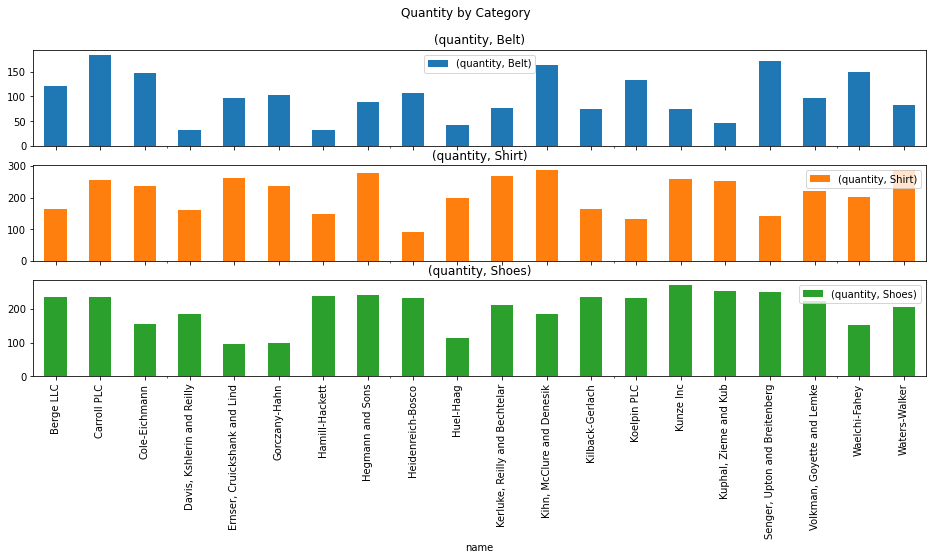

In [166]:
quantity_unstack.plot(kind='bar', title="Quantity by Category", subplots=True, figsize=(16,6))